In [1]:
# pip install pygad

# Zadanie przykładowe

Parameters of the best solution : [0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1.]
Fitness value of the best solution = -0.0
Predicted output based on the best solution : 252.0


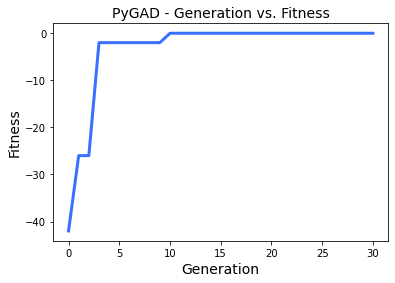

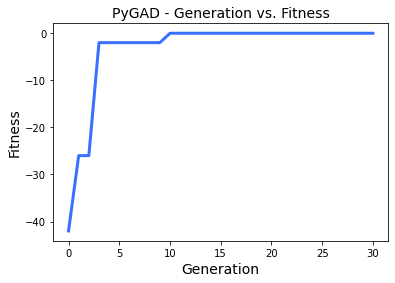

In [2]:
import pygad
import numpy as np

S = [1, 2, 3, 6, 10, 17, 25, 29, 30, 41, 51, 60, 70, 79, 80]

#definiujemy parametry chromosomu
#geny to liczby: 0 lub 1
gene_space = [0, 1]

#definiujemy funkcję fitness
def fitness_func(solution, solution_idx):
    sum1 = np.sum(solution * S)
    solution_invert = 1 - solution
    sum2 = np.sum(solution_invert * S)
    fitness = -np.abs(sum1-sum2)
    #lub: fitness = 1.0 / (1.0 + numpy.abs(sum1-sum2))
    return fitness

fitness_function = fitness_func

#ile chromsomów w populacji
#ile genow ma chromosom
sol_per_pop = 10
num_genes = len(S)

#ile wylaniamy rodzicow do "rozmanazania" (okolo 50% populacji)
#ile pokolen
#ilu rodzicow zachowac (kilka procent)
num_parents_mating = 5
num_generations = 30
keep_parents = 2

#jaki typ selekcji rodzicow?
#sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa
parent_selection_type = "sss"

#w il =u punktach robic krzyzowanie?
crossover_type = "single_point"

#mutacja ma dzialac na ilu procent genow?
#trzeba pamietac ile genow ma chromosom
mutation_type = "random"
mutation_percent_genes = 8

#inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

#uruchomienie algorytmu
ga_instance.run()

#podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

#tutaj dodatkowo wyswietlamy sume wskazana przez jedynki
prediction = np.sum(S*solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

#wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()

# Zadanie 1

Parameters of the best solution : [0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.]
Fitness value of the best solution = 1630.0
Predicted output based on the best solution : [  0. 300. 200.   0. 500.   0. 100. 250.   0. 280.   0.]


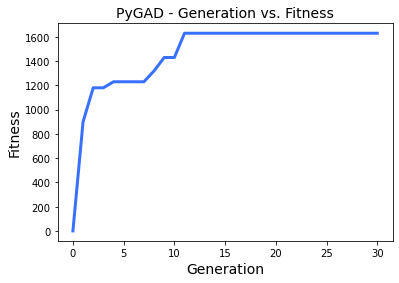

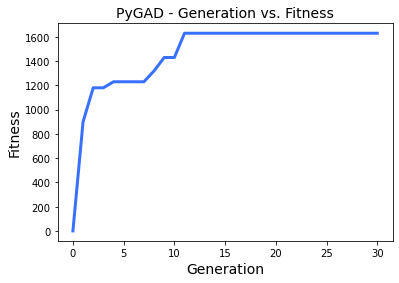

In [3]:
items = {'names' : ['zegar', 'obraz-pejzaż', 'obraz-portret', 'radio', 'laptop', 'lampka nocna', 'srebrne sztućce',
                    'porcelana', 'figura z brązu', 'skórzana torebka', 'odkurzacz'],
    'values' : [100, 300, 200, 40, 500, 70, 100, 250, 300, 280, 300],
    'weight' : [7, 7, 6, 2, 5, 6, 1, 3, 10, 3, 15]}
#definiujemy parametry chromosomu
#geny to liczby: 0 lub 1
# 0 nie bierzemy, 1 bierzemy do plecaka
gene_space = [0, 1]

#definiujemy funkcję fitness
def fitness_func(solution, solution_idx):
    weight = items['weight'] * solution
    values =  items['values'] * solution
    sum_weight = np.sum(weight)
    sum_values = np.sum(values)
    if sum_weight <= 25:
        fitness = sum_values
    else:
        fitness = 0
    return fitness

fitness_function = fitness_func

#ile chromsomów w populacji
#ile genow ma chromosom
sol_per_pop = 10
num_genes = len(items['values'])

#ile wylaniamy rodzicow do "rozmanazania" (okolo 50% populacji)
#ile pokolen
#ilu rodzicow zachowac (kilka procent)
num_parents_mating = 5
num_generations = 30 # nieskompliwany problem więc zostawiam 30
keep_parents = 2

#jaki typ selekcji rodzicow?
#sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa
parent_selection_type = "sss"

#w il =u punktach robic krzyzowanie?
crossover_type = "single_point"

#mutacja ma dzialac na ilu procent genow?
# min 1/len(chromosomu) -> 1/11 = 0.9 
#trzeba pamietac ile genow ma chromosom
mutation_type = "random"
mutation_percent_genes = 10

#inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

#uruchomienie algorytmu
ga_instance.run()

#podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

#tutaj dodatkowo wyswietlamy wartości wskazana przez jedynki
prediction = items['values'] * solution
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

#wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()

# Zadanie 2

Parameters of the best solution : [0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.]
Fitness value of the best solution = 1630.0
Predicted output based on the best solution : [  0. 300. 200.   0. 500.   0. 100. 250.   0. 280.   0.]


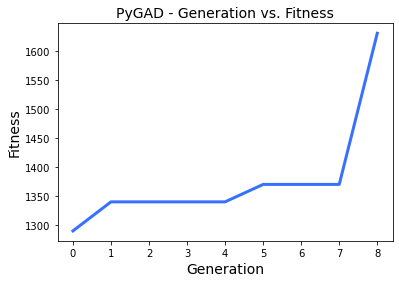

mean time:  0.007381343841552734
mean generation:  11.3


[8, 14, 14, 20, 15, 13, 1, 9, 11, 8]

In [4]:
import time
items = {'names' : ['zegar', 'obraz-pejzaż', 'obraz-portret', 'radio', 'laptop', 'lampka nocna', 'srebrne sztućce',
                    'porcelana', 'figura z brązu', 'skórzana torebka', 'odkurzacz'],
    'values' : [100, 300, 200, 40, 500, 70, 100, 250, 300, 280, 300],
    'weight' : [7, 7, 6, 2, 5, 6, 1, 3, 10, 3, 15]}
#definiujemy parametry chromosomu
#geny to liczby: 0 lub 1
# 0 nie bierzemy, 1 bierzemy do plecaka
gene_space = [0, 1]

#definiujemy funkcję fitness
def fitness_func(solution, solution_idx):
    weight = items['weight'] * solution
    values =  items['values'] * solution
    sum_weight = np.sum(weight)
    sum_values = np.sum(values)
    if sum_weight <= 25:
        fitness = sum_values
    else:
        fitness = 0
    return fitness

fitness_function = fitness_func

#ile chromsomów w populacji
#ile genow ma chromosom
sol_per_pop = 10
num_genes = len(items['values'])

#ile wylaniamy rodzicow do "rozmanazania" (okolo 50% populacji)
#ile pokolen
#ilu rodzicow zachowac (kilka procent)
num_parents_mating = 5
num_generations = 30 # nieskompliwany problem więc zostawiam 30
keep_parents = 2

#jaki typ selekcji rodzicow?
#sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa
parent_selection_type = "sss"

#w il =u punktach robic krzyzowanie?
crossover_type = "single_point"

#mutacja ma dzialac na ilu procent genow?
# min 1/len(chromosomu) -> 1/11 = 0.91
#trzeba pamietac ile genow ma chromosom
mutation_type = "random"
mutation_percent_genes = 10

# mierze czas
times = []
gen = []

for i in range(10):
    start = time.time()


    #inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
    ga_instance = pygad.GA(gene_space=gene_space,
                           num_generations=num_generations,
                           num_parents_mating=num_parents_mating,
                           fitness_func=fitness_function,
                           sol_per_pop=sol_per_pop,
                           num_genes=num_genes,
                           parent_selection_type=parent_selection_type,
                           keep_parents=keep_parents,
                           crossover_type=crossover_type,
                           mutation_type=mutation_type,
                           mutation_percent_genes=mutation_percent_genes, stop_criteria= ['reach_1600'])

    #uruchomienie algorytmu
    ga_instance.run()

    # koncze mierzyc czas
    end = time.time()
    #print('time: ', end - start)
    times.append(end - start)
    gen.append(ga_instance.generations_completed)

#podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

#tutaj dodatkowo wyswietlamy wartości wskazana przez jedynki
prediction = items['values'] * solution
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

#wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()
print('mean time: ', np.mean(times))
print('mean generation: ', np.mean(gen))
gen